In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/Bai_tap_LDS6/Time Series/sales-of-shampoo-over-a-three-year.csv')
df.head()

,Month,Sales of shampoo over a three year period
0,"Friday, January 1, 2016",266.0
1,"Monday, February 1, 2016",145.9
2,"Tuesday, March 1, 2016",183.1
3,"Friday, April 1, 2016",119.3
4,"Sunday, May 1, 2016",180.3


In [5]:
df['Month'] = pd.to_datetime(df['Month'])

In [6]:
df.index = df['Month']

In [7]:
df.drop(columns=['Month'],inplace = True)

In [8]:
df.tail()

,Sales of shampoo over a three year period
Month,
2018-08-01,407.6
2018-09-01,682.0
2018-10-01,475.3
2018-11-01,581.3
2018-12-01,646.9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2016-01-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sales of shampoo over a three year period  36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


In [10]:
df.rename(columns = {'Sales of shampoo over a three year period':'Sales_of_shampoo'}, inplace = True)

<Figure size 1080x576 with 0 Axes>

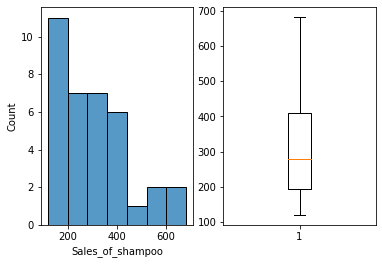

In [11]:
plt.figure(figsize = (15,8))
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.histplot(df['Sales_of_shampoo'],ax=ax1)
ax2.boxplot(df['Sales_of_shampoo'])
plt.show()

In [12]:
from datetime import datetime

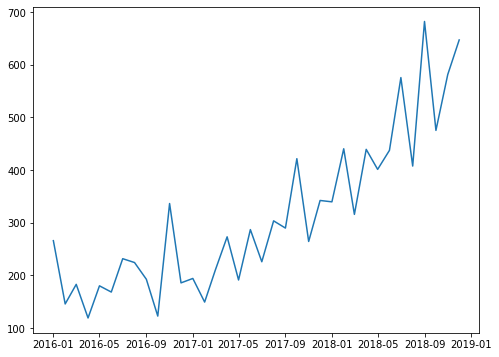

In [13]:
plt.figure(figsize = (8,6))
plt.plot(df['Sales_of_shampoo'])
plt.show()

In [14]:
type(df)

pandas.core.frame.DataFrame

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
result = seasonal_decompose(x=df, model='multiplicative')
result

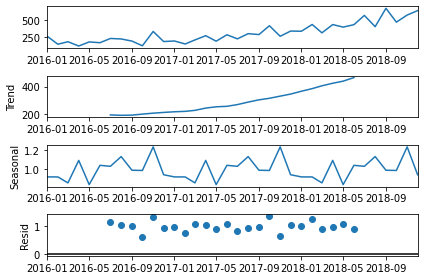

In [17]:
result.plot()
plt.show()

**ARIMA MODEL**

In [18]:
pip install pmdarima

In [19]:
from pmdarima import auto_arima

In [20]:
stepwise_model = auto_arima(df, start_p=2, start_q= 2,
max_p=5, max_q=5, m=12,
start_P=1, seasonal=True,
d=1, D=1, trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=1.41 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=305.954, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=287.610, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=289.951, Time=0.35 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=287.696, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=inf, Time=1.01 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.51 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=287.722, Time=0.48 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=291.040, Time=2.86 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=303.591, Time=0.29 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=286.460, Time=0.50 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=288.501, Time=0.19 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=inf, Time=3.19 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.75 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=287.268, T

In [21]:
print(stepwise_model.aic())

285.4635906667592


In [60]:
train = df.loc['2016-01-01':'2018-02-01']
test = df.loc['2018-02-01':]

In [61]:
print('len 0f test:' ,len(test))
print('len of train:',len(train))

len 0f test: 11
len of train: 26


In [62]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [63]:
future_forecast = stepwise_model.predict(n_periods = len(test))

In [64]:
future_forecast

array([301.37821962, 375.19263596, 338.01218995, 388.59958066,
       391.89687689, 423.7755423 , 398.01231017, 413.41903819,
       471.17195126, 416.54025412, 420.25737246])

In [65]:
future_forecast = pd.DataFrame(future_forecast,
index = test.index,
columns=['Prediction'])

In [66]:
future_forecast

,Prediction
Month,
2018-02-01,301.378220
2018-03-01,375.192636
2018-04-01,338.012190
2018-05-01,388.599581
2018-06-01,391.896877
2018-07-01,423.775542
2018-08-01,398.012310
2018-09-01,413.419038
2018-10-01,471.171951


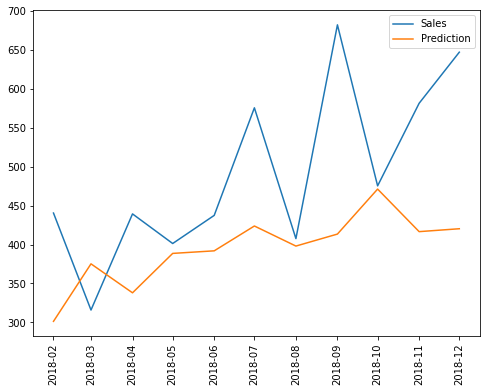

In [67]:
plt.figure(figsize = (8,6))
plt.plot(test, label = 'Sales')
plt.plot(future_forecast,label = 'Prediction')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

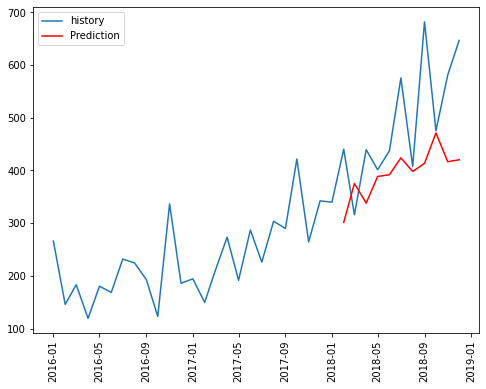

In [68]:
plt.figure(figsize = (8,6))
plt.plot(df, label = 'history')
plt.plot(future_forecast, label = 'Prediction',color = 'r')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [69]:
next_3_month = stepwise_model.predict(len(test)+3)

**HoltWinter**

In [70]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [71]:
model = ExponentialSmoothing(train,seasonal = 'mul').fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [72]:
pred = model.predict(start = test.index[0],end = test.index[-1])

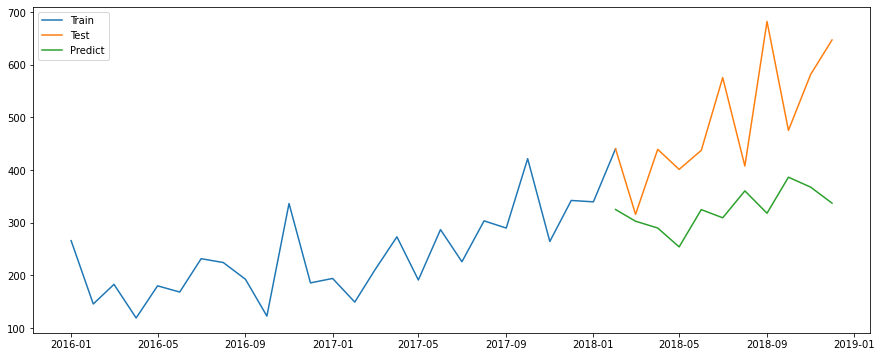

In [73]:
plt.figure(figsize = (15,6))
plt.plot(train.index, train, label = 'Train')
plt.plot(test.index, test, label = 'Test')
plt.plot(pred.index, pred, label = 'Predict')
plt.legend()
plt.show()

Prediction in 3 month

In [75]:
import datetime
s = datetime.datetime(2019,2,1)
e = datetime.datetime(2019,4,1)
pred_3_month = model.predict(start = s, end = e)
pred_3_month

2019-02-01    359.264350
2019-03-01    302.890497
2019-04-01    290.061925
Freq: MS, dtype: float64

In [76]:
x = pd.Series(pred_3_month)

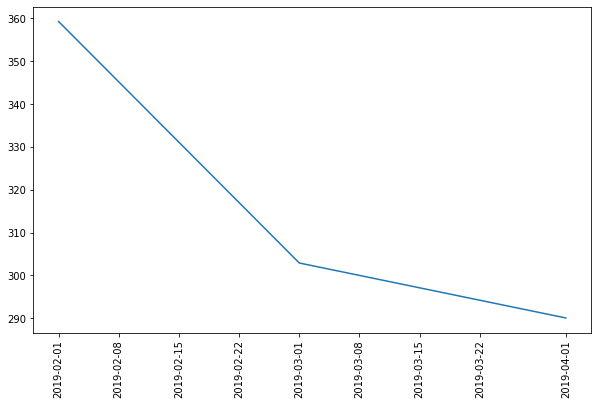

In [79]:
plt.figure(figsize = (10,6))
plt.plot(x.index,x.values, label = 'Predict 3 month')
plt.xticks(rotation = 90)
plt.show()

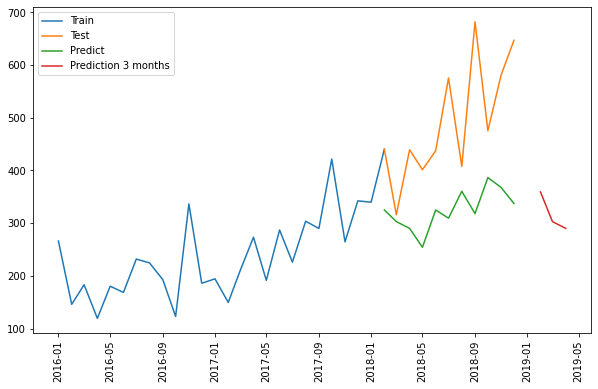

In [81]:
plt.figure (figsize = (10,6))
plt.plot(train.index, train, label = 'Train')
plt.plot(test.index, test, label = 'Test')
plt.plot(pred.index, pred, label = 'Predict')
plt.plot(x.index, x.values, label = 'Prediction 3 months')
plt.legend()
plt.xticks(rotation = 90)
plt.show()